In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
data = pd.read_csv("mnist_train.csv")


In [3]:
rownum  = 10
if -1<rownum <len(data):
    pixels = data.iloc[rownum,1:].values.reshape(28,28)
    array1 =np.array(pixels,dtype=np.uint8)


Text(0.5, 1.0, 'Original Image')

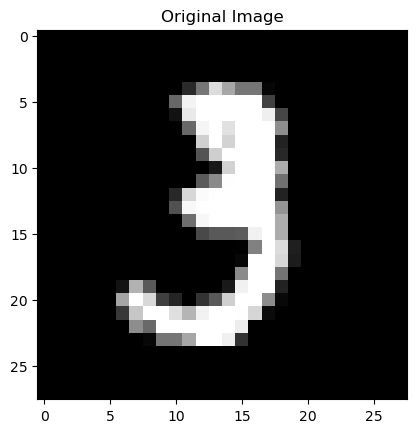

In [4]:
plt.imshow(array1,cmap='gray')
plt.title("Original Image")

In [5]:
def apply_erosion(image,kernal):
    padded_image = np.pad(image,((1,1),(1,1)),mode='constant',constant_values=0)
    eroded_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            eroded_image[i,j] = np.min(padded_image[i:i+kernal.shape[0],j:j+kernal.shape[1]]*kernal)
    return eroded_image

In [23]:
def apply_dialation(image,kernal):
    padded_image =np.pad(image,((1,1),(1,1)),mode='constant',constant_values=0)
    dialated_image = np.zeros_like(image,dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            dialated_image[i,j] = np.max(padded_image[i:i+kernal.shape[0],j:j+kernal.shape[1]]* kernal)
    return dialated_image

In [31]:
def apply_opening(image,kernal):
    eroded = apply_erosion(image,kernal)
    opened = apply_dialation(eroded,kernal)
    return opened

In [32]:
def apply_closing(image,kernal):
    dialated = apply_dialation(image,kernal)
    closed = apply_erosion(dialated,kernal)
    return closed

In [33]:
binary_image = np.where(array1 > 128, 1, 0).astype(np.uint8)
structuring_element = np.ones((3, 3), dtype=np.uint8)

Text(0.5, 1.0, 'Erosion')

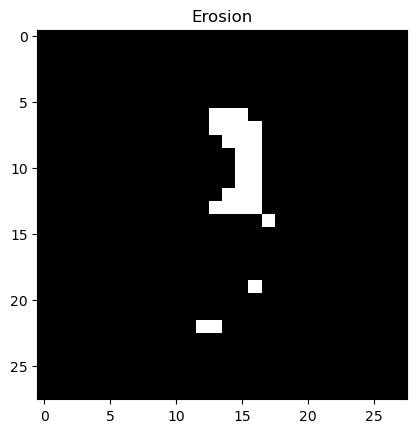

In [34]:
eroded_image = apply_erosion(binary_image, structuring_element)
plt.imshow(eroded_image,cmap='gray')
plt.title("Erosion")

Text(0.5, 1.0, 'Dialation')

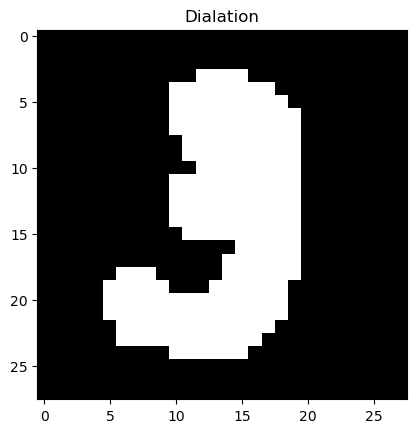

In [35]:
dialated_image = apply_dialation(binary_image, structuring_element)
plt.imshow(dialated_image,cmap='gray')
plt.title("Dialation")  

Text(0.5, 1.0, 'open')

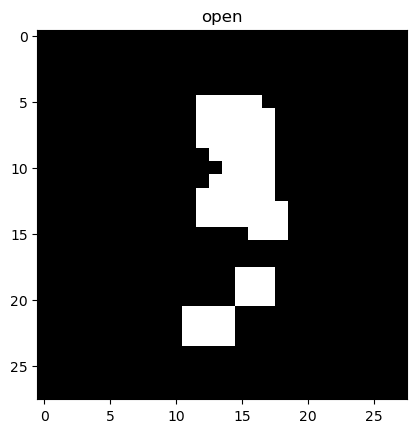

In [36]:
opened_image = apply_opening(binary_image, structuring_element)
plt.imshow(opened_image,cmap='gray')
plt.title("open")  

Text(0.5, 1.0, 'close')

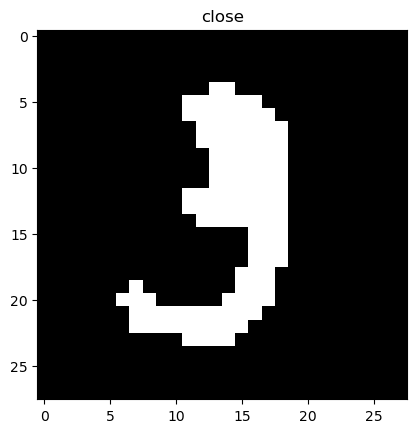

In [37]:
closed_image = apply_closing(binary_image, structuring_element)
plt.imshow(closed_image,cmap='gray')
plt.title("close")  